# Navier Stokes Equations

The Navier-Stokes equations for an incompressible fluid are 

$$
\frac{\partial \vec{u}}{\partial t} + (\vec{u} \cdot \nabla) \vec{u} = -\frac{1}{\rho} \nabla p 
+ \nu \nabla ^2 \vec{u} \\ 
\nabla \cdot \vec{u} = 0
$$

Where $ \vec{u} = (u,v,w) $ is a velocity field, $p$ is a scalar pressure field, $\rho$ is fluid density, and $\nu$ is the kinematic viscosity. In its current form, boundary conditions must be applied explicitly, making it difficult to solve for systems whose boundaries are not simple shapes. The smoothed-boundary method is a diffuse interface model which introduces a domain parameter $\psi$, which allows us to solve the PDE within boundaries of arbitrary geometry, with boundary conditions imposed implicitly by the domain parameter. [Background on the smoothed-boundary method](https://arxiv.org/abs/1107.5341)

# SBM  for Momentum Equations

Since velocity $\vec{u}$ is a vector field, note that we will apply the standard abuse of notation where 

$$
\nabla \vec{u} = 
\begin{bmatrix}
    \frac{\partial}{\partial x} \\
    \frac{\partial}{\partial y}
\end{bmatrix}
\begin{bmatrix}
    u & v
\end{bmatrix}
=
\begin{bmatrix}
    \frac{\partial u}{\partial x} & \frac{\partial v}{\partial x} \\
    \frac{\partial u}{\partial y} & \frac{\partial v}{\partial y}
\end{bmatrix}
\hspace{2cm}
\nabla \cdot \vec{u} = \bigg[ \frac{\partial}{\partial x} \,\,\, \frac{\partial}{\partial y} \bigg]
\begin{bmatrix}
    u \\
    v
\end{bmatrix}
= \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}
$$

We can apply the smoothed boundary method to the velocity field by multiplying both sides of the momentum equation by the domain parameter $\psi$, and applying the idendtity $\psi \nabla^2 \vec{u} = \nabla \cdot \left(\psi \nabla \vec{u} \right) - \nabla \psi \cdot \nabla \vec{u}$. The resulting equation is

$$
\psi \frac{\partial \vec{u}}{\partial t} + \psi \left(\vec{u}\cdot \nabla \vec{u} \right) =
-\frac{\psi}{\rho} \nabla p + \nu \left(\nabla \cdot \left(\psi \nabla \vec{u} \right) - \nabla \psi \cdot \nabla \vec{u} \right)
$$

Our wall boundary conditions are characterized by the amount of "slip" between the surface and the solid wall. This can be written as the directional derivative $\nabla_{\vec{n}} u$, where $\vec{n}$ is the normal vector to the fluid-wall interface. Using our domain parameter, we can say that $\vec{n} = \frac{\nabla \psi}{|\nabla \psi|}$. This allows us to implicitly impose our boundary conditions as follows

$$
\nabla_\vec{n} \vec{u} = \nabla \vec{u} \cdot \frac{\nabla \psi}{\left|\nabla \psi \right|} = B_{slip} \\
\Rightarrow \nabla \psi \cdot \nabla \vec{u} = \left|\nabla \psi \right| B_{slip}
$$

We can now substitute this term into our momentum equation to implicitly impose our wall boundary conditions.

$$
\psi \frac{\partial \vec{u}}{\partial t} + \psi \left(\vec{u}\cdot \nabla \vec{u} \right) =
-\frac{\psi}{\rho} \nabla p + \nu \left(\nabla \cdot \left(\psi \nabla \vec{u} \right) - \left|\nabla \psi \right| B_{slip} \right)
$$

For no-slip boundary conditions, $B_{slip} = 0$, and the equation becomes

$$
\psi \frac{\partial \vec{u}}{\partial t} + \psi \left(\vec{u}\cdot \nabla \vec{u} \right) =
-\frac{\psi}{\rho} \nabla p + \nu \nabla \cdot \left(\psi \nabla \vec{u} \right)
$$

In two dimensions, we can write the smooth-boundary formulation of the momentum equations as 

$$
\psi \frac{\partial u}{\partial t} + \psi\left(u\frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}\right) =
-\frac{\psi}{\rho}\left(\frac{\partial p}{\partial x}\right) + \nu \nabla \cdot \left(\psi \nabla u \right) 
$$

$$
\psi \frac{\partial v}{\partial t} + \psi\left(u\frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y}\right) =
-\frac{\psi}{\rho}\left(\frac{\partial p}{\partial y}\right) + \nu \nabla \cdot \left(\psi \nabla v \right) 
$$

# SBM for Pressure Equations

To numerically solve the momentum equation, we choose the following time scheme:

$$
\frac{\left(\vec{u}^{n+1} - \vec{u}^{n + \frac{1}{2}}\right)
- \left(\vec{u}^{n+\frac{1}{2}} - \vec{u}^n \right)
}{\Delta t}
+ \vec{u}^n \cdot \nabla \vec{u}^n = -\frac{1}{\rho} \nabla p^{n + \frac{1}{2}} + \frac{\nu}{\psi} \nabla \cdot \left(\psi \nabla \vec{u}^n \right) 
$$

We can decouple pressure and velocity fields as

$$
\frac{\vec{u}^{n + \frac{1}{2}} - \vec{u}^n}{\Delta t} + \vec{u}^n \cdot \nabla \vec{u}^n = \frac{\nu}{\psi} \nabla \cdot \left(\psi \nabla \vec{u}^n \right)
$$

$$
\frac{\vec{u}^{n+1} - \vec{u}^{n + \frac{1}{2}}}{\Delta t} = - \frac{1}{\rho}\nabla p^{n + \frac{1}{2}}
$$

Taking the divergence of the pressure equation, and forcing $\nabla \cdot \vec{u}^{n + 1} = 0 \,$ in order to ensure continuity, we obtain a Poisson equation for pressure.

$$
\nabla^2 p^{n + \frac{1}{2}} = \rho \frac{\nabla \cdot \vec{u}^{n+\frac{1}{2}}}{\Delta t}
$$

Multiplying both sides of our poisson equation by the domain parameter $\psi$, and applying the identity $\,\psi \nabla^2 p = \nabla \cdot \left( \psi \nabla p\right) - \nabla \psi \cdot \nabla p \,$, our equation becomes 

$$
\nabla \cdot \left( \psi \nabla p^{n+\frac{1}{2}}\right) - \nabla \psi \cdot \nabla p^{n + \frac{1}{2}}
= \psi \rho \frac{\nabla \cdot \vec{u}^{n + \frac{1}{2}}}{\Delta t}
$$

The pressure gradient at the across a boundary is what drives the flow of fluid across it. It can be thought of as the directional derivative $\nabla_{\vec{n}} p$, where $\vec{n}$ is the unit normal vector at the interface. Using our domain parameter, we can say that $\vec{n} = \frac{\nabla \psi}{|\nabla \psi|}$. This allows us to implicitly impose our boundary conditions as follows

$$
\nabla_\vec{n} p = \nabla p \cdot \frac{\nabla \psi}{\left|\nabla \psi \right|} = B_{p}
\,\,\Rightarrow\,\, \nabla \psi \cdot \nabla p = \left|\nabla \psi \right| B_{p}
$$

We can substitute this term into our equation to implicitly impose our boundary conditions. Now, the pressure equation becomes 

$$
\nabla \cdot \left( \psi \nabla p^{n+\frac{1}{2}}\right) - \left|\nabla \psi \right| B_{p}
= \psi \rho \frac{\nabla \cdot \vec{u}^{n + \frac{1}{2}}}{\Delta t}
$$

For no-flux boundaries, $B_p = 0$, and we are left with 

$$
\nabla \cdot \left( \psi \nabla p^{n+\frac{1}{2}}\right)
= \psi \rho \frac{\nabla \cdot \vec{u}^{n + \frac{1}{2}}}{\Delta t}
$$

Before we advance our velocity field to time $n+1$, we must solve the above equation for pressure in order to ensure conitunity is satisfied. We can do this iteratively using the Gauss-Seidel method.

# Numerical Scheme 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

**(1) Calculate advection terms using 1st order upwind scheme **

$$u \frac{\partial u}{\partial x} = u_{i,j} \frac{u_{i,j} - u_{i,j-1}}{\Delta x} \,\,\,\, \text{for} \,\,\,\, u_{i,j} > 0$$

$$u \frac{\partial u}{\partial x} = u_{i,j} \frac{u_{i,j+1} - u_{i,j}}{\Delta x} \,\,\,\, \text{for} \,\,\,\, u_{i,j} < 0$$

In [2]:
def advec_terms_2D(nx,ny,dx,dy,u,v,vel):
    """
    Calculates advection terms of Navier-Stokes equation using 1st order upwind scheme
    
    nx,ny = number of grid points in x and y directions
    dx,dy = lattice spacing in x and y directions 
    u,v = x and y components of velocity field
    vel = component u or v of velocity field for which you are solving NS equation 
    """
    advec_x = np.zeros((ny,nx))
    advec_y = np.zeros((ny,nx))
    advec_2D = np.zeros((ny,nx))
    
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            
            if u[i,j] > 0:
                advec_x[i,j] = u[i,j] * (u[i,j] - u[i,j-1])/dx
            else:
                advec_x[i,j] = u[i,j] * (u[i,j+1] - u[i,j])/dx
                
            if v[i,j] > 0:
                advec_y[i,j] = v[i,j] * (v[i,j] - v[i-1,j])/dy
            else:
                advec_y[i,j] = v[i,j] * (v[i+1,j] - v[i,j])/dy
                
    advec_2D[1:ny-1,1:nx-1] = advec_x[1:ny-1,1:nx-1] + advec_y[1:ny-1,1:nx-1]
            
    return(advec_2D)

** (2) Calculate derivatives using 1st order central differencing **

$$\frac{\partial p}{\partial x} = \frac{p_{i,j+1} - p_{i,j-1} }{2\Delta x} $$

In [3]:
def gradient_2D(nx,ny,dx,dy,f):
    """
    Calculates 1st derivatives using central difference 
    
    nx,ny = number of grid points in x and y directions
    dx,dy = lattice spacing in x and y directions
    f = argument to take gradient of   
    """
    
    dfdx = np.zeros((ny,nx))
    dfdy = np.zeros((ny,nx))
    
    dfdx[1:ny-1,1:nx-1] = (f[1:ny-1,2:nx] - f[1:ny-1,0:nx-2])/(2*dx)
    dfdy[1:ny-1,1:nx-1] = (f[2:ny,1:nx-1] - f[0:ny-2,1:nx-1])/(2*dy)
    
    return(dfdx,dfdy) 

** (3) Calculate laplacians using 2nd order central differencing **

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \frac{u_{i,j-1} - 2 u_{i,j} + u_{i,j+1}}{\Delta x^2} + \frac{u_{i-1,j} - 2 u_{i,j} + u_{i+1,j}}{\Delta y^2}$$


In [4]:
def laplacian_2D(nx,ny,dx,dy,f):
    """
    Calculates laplacian using 2nd order central difference 
    
    nx,ny = number of grid points in x and y directions
    dx,dy = lattice spacing in x and y directions
    f = argument to take laplacian of 
    """
    
    lap = np.zeros((ny,nx))
    
    lap[1:ny-1,1:nx-1] = (f[1:ny-1,0:nx-2] - 2*f[1:ny-1,1:nx-1] + f[1:ny-1,2:nx])/(dx**2) + \
                         (f[0:ny-2,1:nx-1] - 2*f[1:ny-1,1:nx-1] + f[2:ny,1:nx-1])/(dy**2)
        
    return(lap)

** (4) Calculate 2nd order "diagonal" terms as follows **

\begin{align}
& \left[ \nabla \cdot \left( \psi \nabla p\right)\right]_{i,j} = \\
& \hspace{3.5cm}  \left(\frac{\psi_{i,j+1} + \psi_{i,j}}{2{\Delta x}^2} \right) p_{i,j+1}
+ \left(\frac{\psi_{i,j} + \psi_{i,j-1}}{2{\Delta x}^2} \right) p_{i,j-1}
+ \left(\frac{\psi_{i+1,j} + \psi_{i,j}}{2{\Delta y}^2} \right) p_{i+1,j}
+ \left(\frac{\psi_{i,j} + \psi_{i-1,j}}{2{\Delta y}^2} \right) p_{i-1,j} \\
& \hspace{3cm}
- \left(\frac{\psi_{i,j+1} + 2\psi_{i,j} + \psi_{i,j-1}}{2{\Delta x}^2} + \frac{\psi_{i+1,j} + 2\psi_{i,j} + \psi_{i-1,j}}{2{\Delta y}^2} \right) p_{i,j}
\end{align}


In [5]:
def diagonal_2D(nx,ny,dx,dy,psi,f):
    """
    Calculates 2nd order terms of the form div(psi * grad(f))
    
    nx,ny = number of grid points in x and y directions
    dx,dy = lattice spacing in x and y directions
    f = argument to take gradient of 
    psi = argument multiplied by grad(f)
    """
    
    diag = np.zeros((ny,nx))
    
    diag[1:ny-1,1:nx-1] = ((psi[1:ny-1,2:nx] + psi[1:ny-1,1:nx-1])/(2*dx**2))*f[1:ny-1,2:nx]        \
                        + ((psi[1:ny-1,1:nx-1] + psi[1:ny-1,0:nx-2])/(2*dx**2))*f[1:ny-1,0:nx-2]    \
                        + ((psi[2:ny,1:nx-1] + psi[1:ny-1,1:nx-1])/(2*dy**2))*f[2:ny,1:nx-1]        \
                        + ((psi[1:ny-1,1:nx-1] + psi[0:ny-2,1:nx-1])/(2*dy**2))*f[0:ny-2,1:nx-1]    \
                        - ((psi[1:ny-1,2:nx] + 2*psi[1:ny-1,1:nx-1] + psi[1:ny-1,0:nx-2])/(2*dx**2) \
                         + (psi[2:ny,1:nx-1] + 2*psi[1:ny-1,1:nx-1] + psi[0:ny-2,1:nx-1])/(2*dy**2) \
                          )*f[1:ny-1,1:nx-1]
    
    return(diag)

 **(5) Calculate the right-hand side of pressure equation **

$$
b_{i,j} = \frac{\psi \rho}{\Delta t} \left(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\right)
$$

In [6]:
def RHS_pressure(nx,ny,dx,dy,rho,dt,psi,u,v):
    """
    Calculates right hand side of pressure-poisson equation 
    
    nx,ny = number of grid points in x and y directions
    dx,dy = lattice spacing in x and y directions
    rho = density
    dt = timestep
    psi = domain parameter
    u,v = x and y components of velocity field 
    """
    
    dudx,dudy = gradient_2D(nx,ny,dx,dy,u)
    dvdx,dvdy = gradient_2D(nx,ny,dx,dy,v)
    
    b = (psi*rho/dt)*(dudx + dvdy)
    
    return(b)

**(5) Use Gauss-Seidel method to iteratively solve poisson equation for pressure**

The Gauss-Seidel method is an iterative method for solving systems of linear equations. It is similar to the Jacobi relaxation method, but has the advantage of referencing already updated points each time it loops through the array. The order in which we go through the elements doesn't matter, so we can choose to do so in a Red-Black "checkerboard" pattern in order to maximize the amount of updated points available.    
[Background on iterative methods for linear systems](https://math.berkeley.edu/~wilken/228A.F07/chr_lecture.pdf)  


We advance our pressure in pseudo-time $m$ according to the following scheme until convergence:

$$
p_{i,j}^{m+1} = \frac{1}{a_{i,j}}\left(b_{i,j} - \sigma \right)
$$

where 

$$ 
\sigma = a_{i,j+1}p_{i,j+1} + a_{i,j-1}p_{i,j-1} + a_{i+1,j}p_{i+1,j} + a_{i-1,j}p_{i-1,j} \\
$$
$$
a_{i,j+1} = \frac{\psi_{i,j+1} + \psi_{i,j}}{2{\Delta x}^2} \hspace{1cm}
a_{i,j-1} = \frac{\psi_{i,j} + \psi_{i,j-1}}{2{\Delta x}^2} \hspace{1cm}
a_{i+1,j} = \frac{\psi_{i+1,j} + \psi_{i,j}}{2{\Delta y}^2} \hspace{1cm}
a_{i-1,j} = \frac{\psi_{i,j} + \psi_{i-1,j}}{2{\Delta y}^2}
$$

$$
a_{i,j} = - \left(\frac{\psi_{i,j+1} + 2\psi_{i,j} + \psi_{i,j-1}}{2{\Delta x}^2} + \frac{\psi_{i+1,j} + 2\psi_{i,j} + \psi_{i-1,j}}{2{\Delta y}^2} \right)
$$


In [7]:
def solve_pressure_2D(nx,ny,dx,dy,b,p,psi,tol):
    """
    Solves pressure equation using successive over-relaxation method
    
    nx,ny = number of grid points in x and y direction
    dx,dy = lattice spacing in x and y directions
    b = right hand side of pressure poisson equation
    p = initial guess for pressure profile
    psi = domain parameter
    tol = convergence criteria
    """
    
    resd = np.zeros((ny,nx))
    tmp = np.zeros((ny,nx))
    
    nrm = 1.0
    
    # Coefficients of linear equations 
    aa = np.zeros((ny,nx))
    a1 = np.zeros((ny,nx))
    a2 = np.zeros((ny,nx))
    a3 = np.zeros((ny,nx))
    a4 = np.zeros((ny,nx))
    
    aa[1:ny-1,1:nx-1] = -1*((psi[1:ny-1,2:nx] + 2*psi[1:ny-1,1:nx-1] + psi[1:ny-1,0:nx-2])/(2*dx**2) \
        + (psi[2:ny,1:nx-1] + 2*psi[1:ny-1,1:nx-1] + psi[0:ny-2,1:nx-1])/(2*dy**2))
    
    a1[1:ny-1,1:nx-1] = (psi[1:ny-1,2:nx] + psi[1:ny-1,1:nx-1])/(2*dx**2)
    a2[1:ny-1,1:nx-1] = (psi[1:ny-1,1:nx-1] + psi[1:ny-1,0:nx-2])/(2*dx**2)
    a3[1:ny-1,1:nx-1] = (psi[2:ny,1:nx-1] + psi[1:ny-1,1:nx-1])/(2*dy**2)
    a4[1:ny-1,1:nx-1] = (psi[1:ny-1,1:nx-1] + psi[0:ny-2,1:nx-1])/(2*dy**2)
    
    # Red-black ordering 
    
    b1_top = 1 # Start with black top left corner
    b1_left = 1
    b2_top = 2
    b2_left = 2
    
    r1_top = 1
    r1_left = 2
    r2_top = 2
    r2_left = 1
    
    if nx % 2 == 0:     # even number of columns
        
        b1_right = nx - 2
        b2_right = nx - 1
        r1_right = nx - 1
        r2_right = nx - 2
        
    else:               # odd number of columns
        
        b1_right = nx - 1
        b2_right = nx - 2
        r1_right = nx - 2
        r2_right = nx - 1
        
    if ny % 2 == 0:     # even number of rows
        
        b1_bottom = ny - 2
        b2_bottom = ny - 1
        r1_bottom = ny - 2
        r2_bottom = ny - 1
        
    else:               # odd number of rows
        
        b1_bottom = ny - 1
        b2_bottom = ny - 2
        r1_bottom = ny - 1
        r2_bottom = ny - 2

        
    niter = 0
    while nrm > tol and niter < 4000:
        
        # Loop though pressure array in red-black order 
        
        for i in range(b1_top,b1_bottom+1,2):
            for j in range(b1_left,b1_right+1,2):
                # Gauss-Seidel method
                sigma = a1[i,j]*p[i,j+1] + a2[i,j]*p[i,j-1] + a3[i,j]*p[i+1,j] + a4[i,j]*p[i-1,j]
                p[i,j] = (b[i,j] - sigma)/aa[i,j]
                
        for i in range(b2_top,b2_bottom+1,2):
            for j in range(b2_left,b2_right+1,2):
                sigma = a1[i,j]*p[i,j+1] + a2[i,j]*p[i,j-1] + a3[i,j]*p[i+1,j] + a4[i,j]*p[i-1,j]
                p[i,j] = (b[i,j] - sigma)/aa[i,j]
        
        for i in range(r1_top,r1_bottom+1,2):
            for j in range(r1_left,r1_right+1,2):
                sigma = a1[i,j]*p[i,j+1] + a2[i,j]*p[i,j-1] + a3[i,j]*p[i+1,j] + a4[i,j]*p[i-1,j]
                p[i,j] = (b[i,j] - sigma)/aa[i,j]
                
        for i in range(r2_top,r2_bottom+1,2):
            for j in range(r2_left,r2_right+1,2):
                sigma = a1[i,j]*p[i,j+1] + a2[i,j]*p[i,j-1] + a3[i,j]*p[i+1,j] + a4[i,j]*p[i-1,j]
                p[i,j] = (b[i,j] - sigma)/aa[i,j]
        
        
        # Create pressure gradient across channel 
        p[:,0] = 1.0
        p[:,nx-1] = 0.0
        
        # Have no pressure gradients across upper and lower walls 
        p[0,:] = p[1,:]
        p[ny-1,:] = p[ny-2,:] 
        
        # Get residuals
        tmp = laplacian_2D(nx,ny,dx,dy,p)
        
        resd[1:ny-1,1:nx-1] = tmp[1:ny-1,1:nx-1] - b[1:ny-1,1:nx-1]

        # Frobenius norm
        nrm = np.sum(np.absolute(resd)**2)**0.5
        niter = niter + 1
    print(niter)
    return(p,niter)

** (6) Visualize Results **

In [8]:
def visualize_2D(numframe,pressure,velocity_u,velocity_v,xx,yy):
    """
    Allows user to create gif of 2D system evolving in time 
    """
    
    outputfile = "NSE_2D_example.gif"
    delay_in_ms = 50
    
    fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
    cmap = plt.get_cmap('jet')
    
    def animate(frame):
        
        p = pressure[frame]
        u = velocity_u[frame]
        v = velocity_v[frame]
        ax.clear()
        plt.contourf(xx, yy, p, 40, cmap = cmap)
        ax.quiver(xx[::2, ::2], yy[::2, ::2], u[::2, ::2], v[::2, ::2], color='k')
        ax.axis('square')
        ax.set_xlabel('x',fontsize = 24)
        ax.set_ylabel('y',fontsize = 24)
        ax.set_title('Navier-Stokes Equations in 2D', fontsize = 24)
        
    anim = FuncAnimation(fig, animate, frames = (numframe), interval = delay_in_ms)
    return(anim)
    #anim.save(outputfile, writer='imagemagick', fps=30)

** (7) Create initial configuration ** 

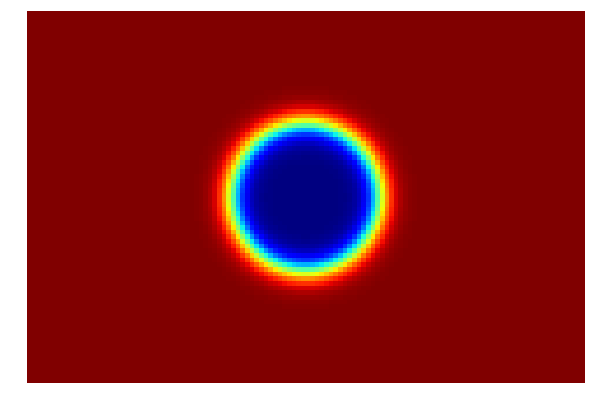

In [9]:
# Number of grid points 
nx = 120
ny = 80

# Lattice spacing 
dx = 1.0e-4
dy = 1.0e-4

# System length 
Lx = dx*(nx-1)
Ly = dy*(ny-1)

x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)

xx,yy = np.meshgrid(x,y)

# Center of obstacle 

xc = Lx/2.0
yc = Ly/2.0
rc = Ly/5.0

rr = ((xx - xc)**2 + (yy - yc)**2)**0.5

# Interface thickness
zeta = 3*dx

phi = np.zeros((nx,ny))
psi = np.zeros((nx,ny))

phi = rr - rc

psi = 0.5*(1 + np.tanh(phi/zeta))

fig = plt.figure(figsize = (10,10))
plt.pcolormesh(psi,cmap = 'jet')
plt.axis('scaled')
plt.axis('off')
plt.show()

** (8) Main program ** 

Note that this python code serves as guide for the numerical implementation of the smoothed boundary method, but that in order to get results in any reasonable amount of time you will have to code this in Fortran or C. 

In [10]:
# Timestep
dt = 1e-12
t_0 = 0.0
t_f = 300*dt

numframes = 100 # Number of frames to save for visualization (+1 for initial config)
interval = int((t_f - t_0)//(dt*numframes)) # Save every nth frame 
t_steps = interval*numframes # number of time steps

# Navier-Stokes parameters
rho = 1.0
nu = 0.1
tol = 0.001 # Pressure-poisson convergence tolerance
smallnum = 1e-8 # Numerical parameter to avoid division by zero

# Velocity field components
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))

# Laplacians of velocity
lap_u = np.zeros((ny,nx))
lap_v = np.zeros((ny,nx))

# Pressure field, and RHS of pressure poisson equation
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))

#p = 0.01*(xx/Lx)

# Pressure gradients
dpdx = np.zeros((ny,nx))
dpdy = np.zeros((ny,nx))

# Advection terms 
advec_u = np.zeros((ny,nx))
advec_v = np.zeros((ny,nx))

# "Diagonal" terms
diag_u = np.zeros((ny,nx))
diag_v = np.zeros((ny,nx))

# Pressure and velocity profiles 
time = np.zeros(numframes+1)
velocity_u = np.zeros((numframes+1,ny,nx))
velocity_v = np.zeros((numframes+1,ny,nx))
pressure = np.zeros((numframes+1,ny,nx))

# Initial configuration
t = t_0
time[0] = t
velocity_u[0,:,:] = u
velocity_v[0,:,:] = v
pressure[0,:,:] = p

for i in range(1,numframes):
    for j in range(0,interval):
        
        # Calculate advection terms
        advec_u = advec_terms_2D(nx,ny,dx,dy,u,v,u)
        advec_v = advec_terms_2D(nx,ny,dx,dy,u,v,v)
        
        # Calculate diagonal terms for velocity
        diag_u = diagonal_2D(nx,ny,dx,dy,psi,u)
        diag_v = diagonal_2D(nx,ny,dx,dy,psi,v)
        
        # Advance velocity field to time n+1/2
        u[1:ny-1,1:nx-1] = u[1:ny-1,1:nx-1] + dt*( -advec_u[1:ny-1,1:nx-1] \
                                                  + (nu/(psi[1:ny-1,1:nx-1] + smallnum))*diag_u[1:ny-1,1:nx-1] )
        v[1:ny-1,1:nx-1] = v[1:ny-1,1:nx-1] + dt*( -advec_v[1:ny-1,1:nx-1] \
                                                  + (nu/(psi[1:ny-1,1:nx-1] + smallnum))*diag_v[1:ny-1,1:nx-1] )
        
        # Solve poisson equation for pressure at time n+1/2
        b = RHS_pressure(nx,ny,dx,dy,rho,dt,psi,u,v)
        p, niter = solve_pressure_2D(nx,ny,dx,dy,b,p,psi,tol)
        
        # Calculate pressure gradients
        dpdx,dpdy = gradient_2D(nx,ny,dx,dy,p)
        
        # Advance velocity field to time n+1
        u[1:ny-1,1:nx-1] = u[1:ny-1,1:nx-1] - dt/rho*dpdx[1:ny-1,1:nx-1]
        v[1:ny-1,1:nx-1] = v[1:ny-1,1:nx-1] - dt/rho*dpdy[1:ny-1,1:nx-1]
        
        # Impose no slip conditions for u and v on upper and lower walls
        v[0,:] = 0.0
        v[ny-1,:] = 0.0

        u[0,:] = 0.0
        u[ny-1,:] = 0.0
        
        # Ensure continuity is satisfied for inlet and outlet points 
        u[1:ny-1,0] = -1*(dx/dy)*(v[2:ny,1] - v[0:ny-2,1]) + u[1:ny-1,2]
        u[1:ny-1,nx-1] = (dx/dy)*(v[2:ny,nx-2] - v[0:ny-2,nx-2]) + u[1:ny-1,nx-3]
        
        # Update time 
        t = t + dt
        
    # Save snapshot of system 
    time[i] = t
    velocity_u[i,:,:] = psi*u
    velocity_v[i,:,:] = psi*v
    pressure[i,:,:] = psi*p                                                                   

KeyboardInterrupt: 